In [12]:
import numpy as np
import matplotlib.pyplot as plt
from plotter import *

G = 6.67430e-11  # gravitational constant
AU = 1.496e+11 # astronomical unit, m
SM = 1.989e30 # solar mass, kg

In [2]:
class Body:
    def __init__(self, name, mass, position, velocity):
        self.name = name
        self.mass = mass
        self.position = np.array(position)
        self.velocity = np.array(velocity)

In [17]:
# Force calculator class with three children, brute force, barnes-hut, and fast multipole
class ForceCalculator:
    def compute_accelerations(self, pos, masses):
        pass
    
# Naively compute all O(n^2) force pairs
class DirectForceCalculator(ForceCalculator):
    
    def compute_accelerations(pos, masses):
        N = len(pos)
        accelerations = np.zeros((N, 3))

        for i in range(N):
            for j in range(N):
                if i == j:
                    continue
                r = pos[i] - pos[j]
                a = (G * masses[j] / np.linalg.norm(r)**3) * r
                accelerations[i] += a
        print(accelerations)
        return accelerations


class BarnesHutForceCalculator(ForceCalculator):
    def compute_accelerations(pos, masses):
        return 0

class FastMultipoleForceCalculator(ForceCalculator):
    def compute_accelerations(pos, masses):
        return 0

In [4]:
# Integrator class with two children, RK4 and Leapfrog (symplectic)
class Integrator():

    def __init__(self, bodies, force_calculator):
        self.bodies = bodies
        self.masses = np.array([b.mass for b in bodies])
        self.force_calculator = force_calculator
        
    def get_state(self):
        pos = np.array([b.position for b in self.bodies])
        vel = np.array([b.velocity for b in self.bodies])
        return pos, vel

    def set_state(self, pos, vel):
        for i, body in enumerate(self.bodies):
            body.position = pos[i]
            body.velocity = vel[i]
    
class RK4Integrator(Integrator):

    def _derivatives(self, pos, vel):
        # helper called by step
        acc = self.force_calculator.compute_accelerations(pos, self.masses)
        return vel, acc

    def step(self, dt):
        
        p0, v0 = self.get_state()

        k1v, k1a = self._derivatives(p0, v0)
        k2v, k2a = self._derivatives(p0 + 0.5 * dt * k1v, v0 + 0.5 * dt * k1a)
        k3v, k3a = self._derivatives(p0 + 0.5 * dt * k2v, v0 + 0.5 * dt * k2a)
        k4v, k4a = self._derivatives(p0 + dt * k3v, v0 + dt * k3a)

        new_pos = p0 + (dt/6)*(k1v + 2*k2v + 2*k3v + k4v)
        new_vel = v0 + (dt/6)*(k1a + 2*k2a + 2*k3a + k4a)

        self.set_state(new_pos, new_vel)

class LeapfrogIntegrator(Integrator):
    
    def step(self, dt):
        pass

In [5]:
# simulation
class NBodySimulation:
    def __init__(self, bodies, Integrator, ForceCalculator):
        self.bodies = bodies
        self.integrator = Integrator(bodies, ForceCalculator)
    
    def plot():
        # plot something from self.bodies
        return 0

    def run(self, dt, steps):
        # position history
        num_bodies = len(self.bodies)
        pos_hist = np.zeros((steps, num_bodies, 3))
        
        for i in range(steps):
            self.integrator.step(dt)
            for j, body in enumerate(self.bodies):
                pos_hist[i][j] = body.position
                
        return pos_hist

In [19]:
p1 = Body("Sun", SM, [0, 0, 0], [0, 500, 400])
p2 = Body("Earth", 5.972e24, [AU, 0, 0], [0, 300, 0])
# p3 = Body("Searth", 5.972e27, [15e8, 0, 14e6], [100, 200, 300])

sim = NBodySimulation([p1, p2], RK4Integrator, DirectForceCalculator)
day = 60*60*24

soln = sim.run(day, 300)

#plot

[[-1.78099350e-08  0.00000000e+00  0.00000000e+00]
 [ 5.93167462e-03  0.00000000e+00  0.00000000e+00]]
[[-1.78099346e-08  1.02859515e-12  2.05719031e-12]
 [ 5.93167447e-03 -3.42577991e-07 -6.85155981e-07]]
[[-1.78072991e-08  1.02836685e-12  2.05673370e-12]
 [ 5.93079671e-03 -3.42501953e-07 -6.85003905e-07]]
[[-1.78046629e-08  2.05642923e-12  4.11285845e-12]
 [ 5.92991871e-03 -6.84902500e-07 -1.36980500e-06]]
[[-1.78046632e-08  2.05637854e-12  4.11275708e-12]
 [ 5.92991879e-03 -6.84885619e-07 -1.36977124e-06]]
[[-1.77993934e-08  3.08330004e-12  6.16660009e-12]
 [ 5.92816369e-03 -1.02690619e-06 -2.05381239e-06]]
[[-1.77967611e-08  3.08276808e-12  6.16553616e-12]
 [ 5.92728697e-03 -1.02672902e-06 -2.05345804e-06]]
[[-1.77888649e-08  4.10794304e-12  8.21588608e-12]
 [ 5.92465712e-03 -1.36816790e-06 -2.73633580e-06]]
[[-1.77888647e-08  4.10789235e-12  8.21578471e-12]
 [ 5.92465704e-03 -1.36815102e-06 -2.73630204e-06]]
[[-1.77783451e-08  5.13071637e-12  1.02614327e-11]
 [ 5.92115346e-03 -1.7

[[-5.79142042e-09  3.60459245e-11  7.20918490e-11]
 [ 1.92885720e-03 -1.20052485e-05 -2.40104969e-05]]
[[-5.79126002e-09  3.60449246e-11  7.20898493e-11]
 [ 1.92880378e-03 -1.20049155e-05 -2.40098309e-05]]
[[-5.73893689e-09  3.58265872e-11  7.16531744e-11]
 [ 1.91137734e-03 -1.19321972e-05 -2.38643945e-05]]
[[-5.73893594e-09  3.58265803e-11  7.16531605e-11]
 [ 1.91137702e-03 -1.19321949e-05 -2.38643899e-05]]
[[-5.68716260e-09  3.56087654e-11  7.12175307e-11]
 [ 1.89413369e-03 -1.18596508e-05 -2.37193015e-05]]
[[-5.68700932e-09  3.56078042e-11  7.12156085e-11]
 [ 1.89408264e-03 -1.18593306e-05 -2.37186613e-05]]
[[-5.63578698e-09  3.53905866e-11  7.07811732e-11]
 [ 1.87702283e-03 -1.17869854e-05 -2.35739708e-05]]
[[-5.63578608e-09  3.53905799e-11  7.07811599e-11]
 [ 1.87702252e-03 -1.17869832e-05 -2.35739663e-05]]
[[-5.58510348e-09  3.51739545e-11  7.03479090e-11]
 [ 1.86014247e-03 -1.17148351e-05 -2.34296703e-05]]
[[-5.58495699e-09  3.51730306e-11  7.03460612e-11]
 [ 1.86009368e-03 -1.1

[[-1.80098492e-09  1.41216762e-11  2.82433524e-11]
 [ 5.99825688e-04 -4.70328432e-06 -9.40656863e-06]]
[[-1.78953045e-09  1.40422835e-11  2.80845671e-11]
 [ 5.96010729e-04 -4.67684225e-06 -9.35368450e-06]]
[[-1.78952196e-09  1.40422169e-11  2.80844337e-11]
 [ 5.96007901e-04 -4.67682005e-06 -9.35364011e-06]]
[[-1.77816820e-09  1.39634158e-11  2.79268315e-11]
 [ 5.92226483e-04 -4.65057501e-06 -9.30115003e-06]]
[[-1.77816817e-09  1.39634155e-11  2.79268310e-11]
 [ 5.92226471e-04 -4.65057491e-06 -9.30114983e-06]]
[[-1.76691379e-09  1.38851991e-11  2.77703982e-11]
 [ 5.88478152e-04 -4.62452461e-06 -9.24904923e-06]]
[[-1.76690556e-09  1.38851344e-11  2.77702689e-11]
 [ 5.88475412e-04 -4.62450308e-06 -9.24900616e-06]]
[[-1.75574972e-09  1.38074997e-11  2.76149994e-11]
 [ 5.84759913e-04 -4.59864650e-06 -9.19729300e-06]]
[[-1.75574969e-09  1.38074994e-11  2.76149988e-11]
 [ 5.84759901e-04 -4.59864640e-06 -9.19729281e-06]]
[[-1.74469110e-09  1.37304396e-11  2.74608792e-11]
 [ 5.81076791e-04 -4.5

 [ 2.72923203e-04 -2.29671077e-06 -4.59342153e-06]]
[[-8.15677799e-10  6.86627769e-12  1.37325554e-11]
 [ 2.71664960e-04 -2.28684299e-06 -4.57368598e-06]]
[[-8.15677796e-10  6.86627766e-12  1.37325553e-11]
 [ 2.71664959e-04 -2.28684298e-06 -4.57368596e-06]]
[[-8.11924784e-10  6.83682905e-12  1.36736581e-11]
 [ 2.70415003e-04 -2.27703499e-06 -4.55406999e-06]]
[[-8.11923609e-10  6.83681916e-12  1.36736383e-11]
 [ 2.70414611e-04 -2.27703170e-06 -4.55406340e-06]]
[[-8.08195291e-10  6.80754892e-12  1.36150978e-11]
 [ 2.69172879e-04 -2.26728312e-06 -4.53456624e-06]]
[[-8.08195287e-10  6.80754889e-12  1.36150978e-11]
 [ 2.69172878e-04 -2.26728311e-06 -4.53456622e-06]]
[[-8.04491432e-10  6.77845547e-12  1.35569109e-11]
 [ 2.67939293e-04 -2.25759342e-06 -4.51518685e-06]]
[[-8.04490283e-10  6.77844579e-12  1.35568916e-11]
 [ 2.67938910e-04 -2.25759020e-06 -4.51518040e-06]]
[[-8.00810708e-10  6.74952805e-12  1.34990561e-11]
 [ 2.66713412e-04 -2.24795902e-06 -4.49591804e-06]]
[[-8.00810705e-10  6.

 [ 1.55465412e-04 -1.35139405e-06 -2.70278810e-06]]
[[-4.65108059e-10  4.04368773e-12  8.08737545e-12]
 [ 1.54906217e-04 -1.34676740e-06 -2.69353479e-06]]
[[-4.65108058e-10  4.04368772e-12  8.08737544e-12]
 [ 1.54906217e-04 -1.34676739e-06 -2.69353479e-06]]
[[-4.63437818e-10  4.02986464e-12  8.05972927e-12]
 [ 1.54349936e-04 -1.34216356e-06 -2.68432711e-06]]
[[-4.63437529e-10  4.02986212e-12  8.05972424e-12]
 [ 1.54349840e-04 -1.34216272e-06 -2.68432544e-06]]
[[-4.61775986e-10  4.01610715e-12  8.03221430e-12]
 [ 1.53796456e-04 -1.33758157e-06 -2.67516313e-06]]
[[-4.61775985e-10  4.01610714e-12  8.03221428e-12]
 [ 1.53796456e-04 -1.33758156e-06 -2.67516313e-06]]
[[-4.60123076e-10  4.00241981e-12  8.00483961e-12]
 [ 1.53245947e-04 -1.33302294e-06 -2.66604588e-06]]
[[-4.60122792e-10  4.00241734e-12  8.00483467e-12]
 [ 1.53245853e-04 -1.33302212e-06 -2.66604423e-06]]
[[-4.58478463e-10  3.98879725e-12  7.97759450e-12]
 [ 1.52698202e-04 -1.32848589e-06 -2.65697178e-06]]
[[-4.58478462e-10  3.

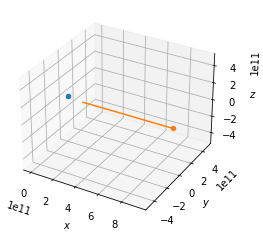

In [18]:
plot_3d_trajectory(soln)